In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import math

In [2]:
#Read in cvs and assigned it to a dataframe
df_all = pd.read_csv('../data/all_clean.csv')

In [3]:
#Created X and y
X = df_all['full_text']
y = df_all['subreddit']



# Calculated the count and percentage breakdown of subreddits (y).
# 0 = jokes
# 1 = dad jokes

In [4]:
y.value_counts()/len(y)

0    0.60356
1    0.39644
Name: subreddit, dtype: float64

In [5]:
y.value_counts()

0    2509
1    1648
Name: subreddit, dtype: int64

# The dataframe is unbalance. There will be a bias to predicting 0 (jokes).


# Logistic Regression Model

In [7]:
#Created a modified stopword list to include certain contractions.
new_stopwords = set(stopwords.words('english')) - {"can't","don't","i'm","let's","you're","i'll",
                                                   "we'll","wouldn't","who's","should've","could've","isn't","hasn't",
                                                  "aren't","haven't","has'nt","o'clock","ma'am","mustn't",
                                                  "how'd","how's","didn't","you'll","she'll","he'll","it'll","they'll",
                                                  }

In [8]:
def my_tokenizer(s):
    return s.split()

In [9]:
cvec = CountVectorizer(analyzer = "word",
                             tokenizer = my_tokenizer,
                             preprocessor = None,
                             stop_words = new_stopwords, max_features=2000)

In [10]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
#transform X and create array of words
X_train_features = cvec.fit_transform(X_train)
X_test_features = cvec.transform(X_test)
X_train_array  = X_train_features.toarray()
X_test_array = X_test_features.toarray()

In [12]:
y_test.value_counts()/len(y_test)

0    0.572115
1    0.427885
Name: subreddit, dtype: float64

In [13]:
y_test.value_counts()

0    595
1    445
Name: subreddit, dtype: int64

In [14]:
#Instantiated logistic regression model
lr = LogisticRegression(random_state=42)

In [15]:
#Fit to the model to training data
lr.fit(X_train_features, y_train)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
#Scored against training data
lr.score(X_train_features, y_train)

0.8533846647417388

In [17]:
#Scored against test data
lr.score(X_test_features, y_test)

0.5980769230769231

In [18]:
#Created a predictions variable
pred = lr.predict(X_test_features)

In [19]:
#Ran an accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.5980769230769231


# Confusion Matrix

In [20]:
#Based partially on code idea via Google
cm = confusion_matrix(y_test,pred) #Assigned matrix
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel() #Broke out elements of matrix

In [21]:
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  434
False Positives:  161
False Negatives:  257
True Positives:  188


In [22]:
#Print out classification metrics
accuracy = round((((tp+tn)/(tp+fn+tn+fp))*100),2)
misclassification = round(((1 - (accuracy/100))*100),2)
sensitivy = round(((tp/(tp+fn))*100),2)
specificity = round(((tn/(tn+fp))*100),2)
precision = round(((tp/(tp+fp))*100),2)
print('Accuracy Rate:',accuracy,'%')
print('Misclassification Rate:',misclassification,'%')
print('Sensitivy Rate:',sensitivy,'%')
print('Specificity Rate:',specificity,'%')
print('Precision Rate:',precision,'%')

Accuracy Rate: 59.81 %
Misclassification Rate: 40.19 %
Sensitivy Rate: 42.25 %
Specificity Rate: 72.94 %
Precision Rate: 53.87 %


In [23]:
#Created a dataframe of the confusion matrix and printed it out.
cm_df = pd.DataFrame(cm, columns=['pred negative', 'pred positive'], index=['actual negative', 'actual positive'])
cm_df

,pred negative,pred positive
actual negative,434,161
actual positive,257,188


# The model has bias to predicting negatives (0) which are Jokes

# Randomized the predictions.  The original data is split 60/40 so I reversed it.

In [24]:
simulated_preds = [np.random.choice([0,1],1, p=[0.4,0.6])[0] for _ in range(len(pred))]

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, simulated_preds))

Accuracy: 0.5086538461538461


# The random model is less accuarate than the model I created

In [26]:
#Confusion matrix
cm = confusion_matrix(y_test,simulated_preds)
tn, fp, fn, tp = confusion_matrix(y_test, simulated_preds).ravel()

In [27]:
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  245
False Positives:  350
False Negatives:  161
True Positives:  284


In [28]:
#Classification metrics
accuracy = round((((tp+tn)/(tp+fn+tn+fp))*100),2)
misclassification = round(((1 - (accuracy/100))*100),2)
sensitivy = round(((tp/(tp+fn))*100),2)
specificity = round(((tn/(tn+fp))*100),2)
precision = round(((tp/(tp+fp))*100),2)
print('Accuracy Rate:',accuracy,'%')
print('Misclassification Rate:',misclassification,'%')
print('Sensitivy Rate:',sensitivy,'%')
print('Specificity Rate:',specificity,'%')
print('Precision Rate:',precision,'%')

Accuracy Rate: 50.87 %
Misclassification Rate: 49.13 %
Sensitivy Rate: 63.82 %
Specificity Rate: 41.18 %
Precision Rate: 44.79 %


In [29]:
cm_df = pd.DataFrame(cm, columns=['pred negative', 'pred positive'], index=['actual negative', 'actual positive'])
cm_df

,pred negative,pred positive
actual negative,245,350
actual positive,161,284


# Grid Search Model

In [30]:
#Established pipeline
pipe = Pipeline([('cvec', CountVectorizer()),
                 ('lr', LogisticRegression())])

In [31]:
#Created model with many parameters
pipe_params = {
    'cvec__max_features': [3000, 4000, 5000,6000,7000,8000],
    'cvec__min_df': [1,2,3,4,5],
    'cvec__max_df': [0.5,0.6,0.7],
    'cvec__ngram_range': [(1,1), (1,2),(1,3)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, n_jobs=5,verbose=2)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    7.3s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   26.4s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:   59.3s
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed:  3.0min
[Parallel(n_jobs=5)]: Done 1350 out of 1350 | elapsed:  3.9min finished


0.615014436958614


/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'cvec__max_df': 0.5,
 'cvec__max_features': 3000,
 'cvec__min_df': 4,
 'cvec__ngram_range': (1, 2)}

In [32]:
#Scored model against traing data
gs.score(X_train, y_train)

0.9072826435675329

In [33]:
#Scored model against test data
gs.score(X_test, y_test)

0.6125

In [34]:
pred = gs.predict(X_test)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.6125


In [36]:
#Confusion matrix
cm = confusion_matrix(y_test,pred)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

In [37]:
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  431
False Positives:  164
False Negatives:  239
True Positives:  206


In [38]:
#Classification metrics
accuracy = round((((tp+tn)/(tp+fn+tn+fp))*100),2)
misclassification = round(((1 - (accuracy/100))*100),2)
sensitivy = round(((tp/(tp+fn))*100),2)
specificity = round(((tn/(tn+fp))*100),2)
precision = round(((tp/(tp+fp))*100),2)
print('Accuracy Rate:',accuracy,'%')
print('Misclassification Rate:',misclassification,'%')
print('Sensitivy Rate:',sensitivy,'%')
print('Specificity Rate:',specificity,'%')
print('Precision Rate:',precision,'%')

Accuracy Rate: 61.25 %
Misclassification Rate: 38.75 %
Sensitivy Rate: 46.29 %
Specificity Rate: 72.44 %
Precision Rate: 55.68 %


In [39]:
cm_df = pd.DataFrame(cm, columns=['pred negative', 'pred positive'], index=['actual negative', 'actual positive'])
cm_df

,pred negative,pred positive
actual negative,431,164
actual positive,239,206


# Naive Bayes model

In [40]:
#Based on code idea I googled.

In [41]:
#Created model
mnb = MultinomialNB()

pipe = Pipeline([
    ('cvec', cvec),
    ('mnb', mnb)
])

In [42]:
pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.7167147898620468
test score: 0.5846153846153846


In [43]:
pred = mnb.predict(X_test_array)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.5846153846153846


In [45]:
#Confusion matrix
cm = confusion_matrix(y_test,pred)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

In [46]:
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  380
False Positives:  215
False Negatives:  217
True Positives:  228


In [47]:
#Classification metrics
accuracy = round((((tp+tn)/(tp+fn+tn+fp))*100),2)
misclassification = round(((1 - (accuracy/100))*100),2)
sensitivy = round(((tp/(tp+fn))*100),2)
specificity = round(((tn/(tn+fp))*100),2)
precision = round(((tp/(tp+fp))*100),2)
print('Accuracy Rate:',accuracy,'%')
print('Misclassification Rate:',misclassification,'%')
print('Sensitivy Rate:',sensitivy,'%')
print('Specificity Rate:',specificity,'%')
print('Precision Rate:',precision,'%')

Accuracy Rate: 58.46 %
Misclassification Rate: 41.54 %
Sensitivy Rate: 51.24 %
Specificity Rate: 63.87 %
Precision Rate: 51.47 %


In [48]:
cm_df = pd.DataFrame(cm, columns=['pred negative', 'pred positive'], index=['actual negative', 'actual positive'])
cm_df

,pred negative,pred positive
actual negative,380,215
actual positive,217,228


# Chart of the top 10 ten words in each subreddit.

In [49]:
#Based on code idea from Google
dad_words = pd.DataFrame(X_train_features.todense(), 
                          columns=cvec.get_feature_names()).reindex(y_train[y_train == 1].index)
top_dad_word = dad_words.mean().sort_values(ascending=False).iloc[:10]

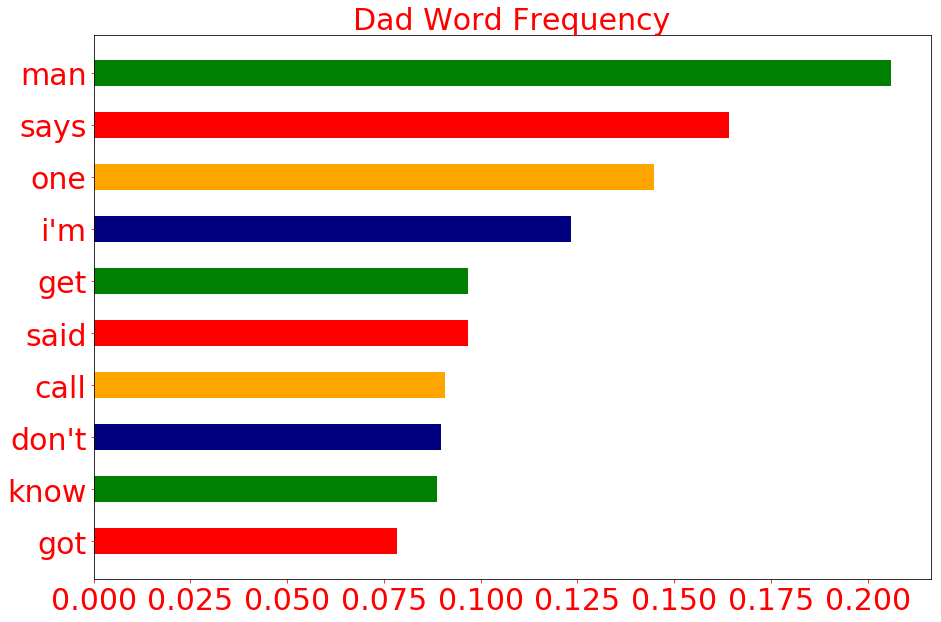

In [67]:
top_dad_word = top_dad_word.sort_values(ascending=True)
plt.figure(figsize=(15,10))
plt.barh(top_dad_word.index, top_dad_word.values,height=.5,color=['red', 'green', 'navy', 'orange'])
plt.rc('xtick', labelsize=30, color='red')
plt.rc('ytick', labelsize=30, color='red')
plt.title('Dad Word Frequency', size=30, color='red');

In [51]:
joke_words = pd.DataFrame(X_train_features.todense(), 
                          columns=cvec.get_feature_names()).reindex(y_train[y_train == 0].index)
top_joke_word = joke_words.mean().sort_values(ascending=False).iloc[:10]

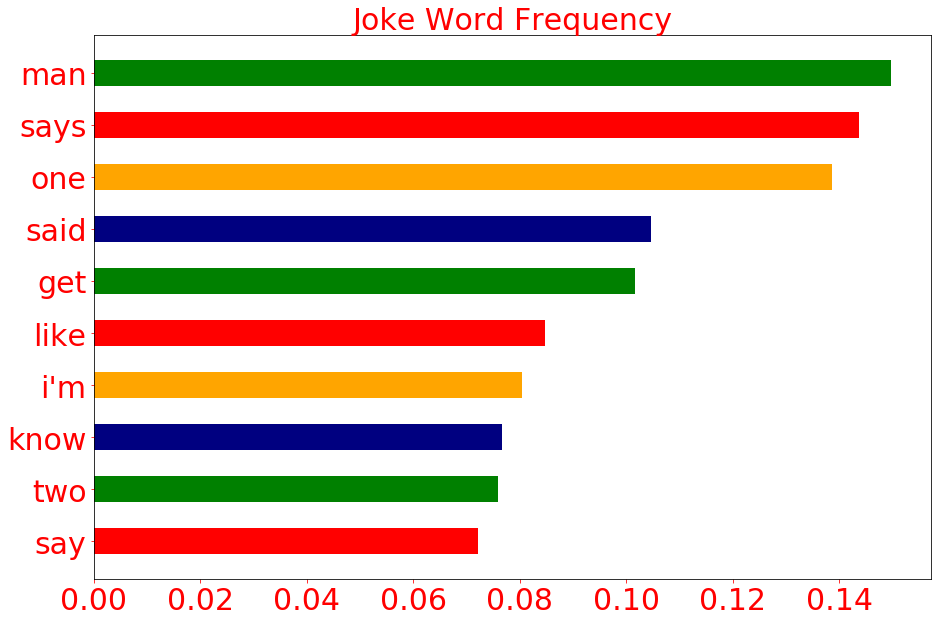

In [69]:
top_joke_word = top_joke_word.sort_values(ascending=True)
plt.figure(figsize=(15,10))
plt.barh(top_joke_word.index, top_joke_word.values,height=.5,color=['red', 'green', 'navy', 'orange'])
plt.rc('xtick', labelsize=30, color='red')
plt.rc('ytick', labelsize=30, color='red')
plt.title('Joke Word Frequency', size=30, color = 'red');

# There is signifigant overlap of the top ten words between the subrebbits.

In [55]:
lr_feat00 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_feat00.columns = ['coef_']
lr_feat00['abs_coef'] = np.abs(lr_feat00['coef_'])
lr_feat00.sort_values(by='abs_coef', ascending=False).head(10)

,coef_,abs_coef
whole,1.574002,1.574002
cow,1.523943,1.523943
shit,-1.509933,1.509933
talk,1.407064,1.407064
middle,-1.369971,1.369971
completely,-1.292824,1.292824
largest,1.280655,1.280655
magician,1.279511,1.279511
running,-1.276584,1.276584
happens,1.271436,1.271436
